In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
from sklearn import svm
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv(r'E:\Akshay\Data Science\Hackathon_02\train (3).csv')

In [3]:
data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


To check percentage-wise division of sentiments in data 
where 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

In [5]:
(data["sentiment"].value_counts()/len(data))*100

1    59.265878
2    32.746769
0     6.268903
3     1.718449
Name: sentiment, dtype: float64

In [6]:
print("Before dropping null tweets",data.shape)
data.drop(data[data["tweet"].isnull() == True].index,axis=0,inplace=True)
print("After dropping null tweets",data.shape)

Before dropping null tweets (7274, 3)
After dropping null tweets (7273, 3)


In [7]:
data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [8]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [9]:
#Importing HTML Parser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [10]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
data["clean_tweet"] = data["tweet"].apply(lambda x: html_parser.unescape(x))

In [14]:
data

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles! All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews One lone dude awaits iPad 2 at Apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT @mention New #UberSocial for #iPhon...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free #SXSW sampler on iTunes {link} #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


Remove @text from tweets

In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [16]:
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "@[\w]*")
data.head(10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles! All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews One lone dude awaits iPad 2 at Apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT New #UberSocial for #iPhone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free #SXSW sampler on iTunes {link} #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


In [17]:
#Changing all the tweets into lowercase
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: x.lower())
data.head(10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews one lone dude awaits ipad 2 at apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"sxsw tips, prince, npr videos, toy shopping wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new #ubersocial for #iphone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free #sxsw sampler on itunes {link} #freemusic
9,883,I think I might go all weekend without seeing ...,2,i think i might go all weekend without seeing ...


In [18]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [19]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [20]:
data['clean_tweet'] =data['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
data.head(-10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews one lone dude awaits ipad 2 at apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"sxsw tips, prince, npr videos, toy shopping wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new #ubersocial for #iphone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free #sxsw sampler on itunes {link} #freemusic
9,883,I think I might go all weekend without seeing ...,2,i think i might go all weekend without seeing ...


In [21]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [22]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
data.head(-10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews one lone dude awaits ipad 2 at apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"sxsw tips, prince, npr videos, toy shopping wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new #ubersocial for #iphone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free #sxsw sampler on itunes {link} #freemusic
9,883,I think I might go all weekend without seeing ...,2,i think i might go all weekend without seeing ...


In [23]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [24]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
data.head(-10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews one lone dude awaits ipad 2 at apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"sxsw tips, prince, npr videos, toy shopping wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new #ubersocial for #iphone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free #sxsw sampler on itunes {link} #freemusic
9,883,I think I might go all weekend without seeing ...,2,i think i might go all weekend without seeing ...


In [25]:
#ReplacingPunctuations with space
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
data.head(10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews one lone dude awaits ipad 2 at apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,sxsw tips prince npr videos toy shopping wi...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new ubersocial for iphone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free sxsw sampler on itunes link freemusic
9,883,I think I might go all weekend without seeing ...,2,i think i might go all weekend without seeing ...


In [26]:
#Replacing Special Characters with space
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
data.head(-10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews one lone dude awaits ipad 2 at apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,sxsw tips prince npr videos toy shopping wi...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new ubersocial for iphone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free sxsw sampler on itunes link freemusic
9,883,I think I might go all weekend without seeing ...,2,i think i might go all weekend without seeing ...


In [27]:
# Replacing Numbers (integers) with space
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
data.head(-10)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews one lone dude awaits ipad at apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,sxsw tips prince npr videos toy shopping wi...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new ubersocial for iphone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free sxsw sampler on itunes link freemusic
9,883,I think I might go all weekend without seeing ...,2,i think i might go all weekend without seeing ...


In [29]:
#Removing words whom length is 1
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
data['clean_tweet'][0:5]

0    sxswnui sxsw apple defining language of touch ...
1    learning ab google doodles all doodles should ...
2    one of the most in your face ex of stealing th...
3    this iphone sxsw app would pretty awesome if i...
4    line outside the apple store in austin waiting...
Name: clean_tweet, dtype: object

In [30]:
data.head(15)

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles all doodles should ...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing th...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone sxsw app would pretty awesome if i...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews one lone dude awaits ipad at apple sx...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,sxsw tips prince npr videos toy shopping with ...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new ubersocial for iphone now in th...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free sxsw sampler on itunes link freemusic
9,883,I think I might go all weekend without seeing ...,2,think might go all weekend without seeing the ...


In [31]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [32]:
# Creating token for the clean tweets
data['tweet_token'] = data['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
data.head(10)

,tweet_id,tweet,sentiment,clean_tweet,tweet_token
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,..."
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles all doodles should ...,"[learning, ab, google, doodles, all, doodles, ..."
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing th...,"[one, of, the, most, in, your, face, ex, of, s..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone sxsw app would pretty awesome if i...,"[this, iphone, sxsw, app, would, pretty, aweso..."
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...,"[line, outside, the, apple, store, in, austin,..."
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews one lone dude awaits ipad at apple sx...,"[technews, one, lone, dude, awaits, ipad, at, ..."
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,sxsw tips prince npr videos toy shopping with ...,"[sxsw, tips, prince, npr, videos, toy, shoppin..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,nu user rt new ubersocial for iphone now in th...,"[nu, user, rt, new, ubersocial, for, iphone, n..."
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,free sxsw sampler on itunes link freemusic,"[free, sxsw, sampler, on, itunes, link, freemu..."
9,883,I think I might go all weekend without seeing ...,2,think might go all weekend without seeing the ...,"[think, might, go, all, weekend, without, seei..."


In [33]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
#Created new columns of tokens - where stop words are being removed
data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
data[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou..."
1,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light..."
2,"[one, of, the, most, in, your, face, ex, of, s...","[one, face, ex, stealing, show, yrs, rt, sxsw,..."
3,"[this, iphone, sxsw, app, would, pretty, aweso...","[iphone, sxsw, app, would, pretty, awesome, cr..."
4,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,..."
5,"[technews, one, lone, dude, awaits, ipad, at, ...","[technews, one, lone, dude, awaits, ipad, appl..."
6,"[sxsw, tips, prince, npr, videos, toy, shoppin...","[sxsw, tips, prince, npr, videos, toy, shoppin..."
7,"[nu, user, rt, new, ubersocial, for, iphone, n...","[nu, user, rt, new, ubersocial, iphone, app, s..."
8,"[free, sxsw, sampler, on, itunes, link, freemu...","[free, sxsw, sampler, itunes, link, freemusic]"
9,"[think, might, go, all, weekend, without, seei...","[think, might, go, weekend, without, seeing, i..."


In [36]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [38]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
data['tweet_stemmed'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
data['tweet_stemmed'].head(10)

0    sxswnui sxsw appl defin languag touch differ d...
1    learn ab googl doodl doodl light funni innov e...
2    one face ex steal show yr rt sxsw appl school ...
3    iphon sxsw app would pretti awesom crash everi...
4    line outsid appl store austin wait new ipad sx...
5    technew one lone dude await ipad appl sxsw sto...
6    sxsw tip princ npr video toy shop zuckerberg l...
7    nu user rt new ubersoci iphon app store includ...
8                  free sxsw sampler itun link freemus
9    think might go weekend without see ipad case t...
Name: tweet_stemmed, dtype: object

In [39]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [40]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['tweet_lemmatized'].head(10)

0    sxswnui sxsw apple defining language touch dif...
1    learning ab google doodle doodle light funny i...
2    one face ex stealing show yr rt sxsw apple sch...
3    iphone sxsw app would pretty awesome crash eve...
4    line outside apple store austin waiting new ip...
5    technews one lone dude awaits ipad apple sxsw ...
6    sxsw tip prince npr video toy shopping zuckerb...
7    nu user rt new ubersocial iphone app store inc...
8              free sxsw sampler itunes link freemusic
9    think might go weekend without seeing ipad cas...
Name: tweet_lemmatized, dtype: object

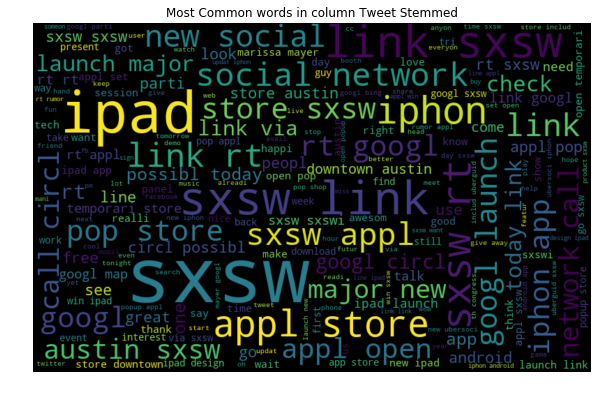

In [41]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

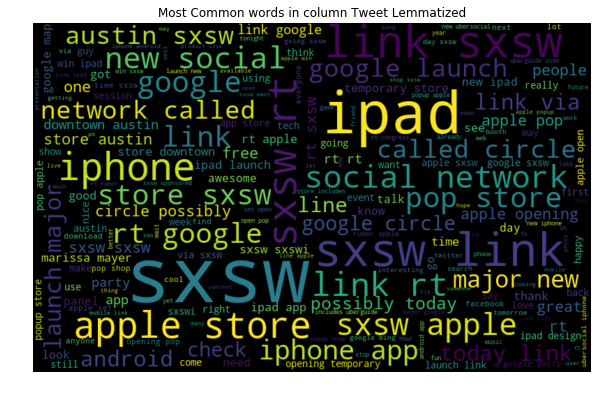

In [42]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

In [43]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1000, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [45]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(data['tweet_stemmed'])
bow_stem

<7273x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 53568 stored elements in Compressed Sparse Row format>

In [46]:
# bag-of-words feature matrix - For column - combine_df['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(data['tweet_lemmatized'])
bow_lemm

<7273x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 51371 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [49]:
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(data['tweet_stemmed'])
tfidf_stem

<7273x6495 sparse matrix of type '<class 'numpy.float64'>'
	with 77583 stored elements in Compressed Sparse Row format>

In [50]:
# TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
tfidf_lemm = tfidf_vectorizer.fit_transform(data['tweet_lemmatized'])
tfidf_lemm

<7273x7651 sparse matrix of type '<class 'numpy.float64'>'
	with 77534 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [53]:
train_bow = bow_stem[:7273,:]


# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data['sentiment'], random_state=42, test_size=0.3)

lreg = DecisionTreeClassifier()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict(xvalid_bow) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.29      0.27      0.28       138
           1       0.71      0.74      0.72      1301
           2       0.53      0.50      0.51       706
           3       0.04      0.03      0.03        37

   micro avg       0.62      0.62      0.62      2182
   macro avg       0.39      0.38      0.39      2182
weighted avg       0.61      0.62      0.62      2182

accuracy score test: 0.6209899175068744


In [55]:
def pipeline(tweet):
    html_parser = HTMLParser()
    data['clean_tweet'] = data['tweet'].apply(lambda x: html_parser.unescape(x))
    data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "@[\w]*")
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: x.lower())
    data['clean_tweet'] =data['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
    data['tweet_token'] = data['clean_tweet'].apply(lambda x: word_tokenize(x))
    data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])
    stemming = PorterStemmer()
    data['tweet_stemmed'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
    lemmatizing = WordNetLemmatizer()
    data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
    bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
    return data
    #bow_stem = bow_vectorizer.fit_transform(data['tweet_stemmed'])
    #bow_lemm = bow_vectorizer.fit_transform(data['tweet_lemmatized'])
    #tfidf_vectorizer = TfidfVectorizer()
    #tfidf_stem = tfidf_vectorizer.fit_transform(data['tweet_stemmed'])
    #tfidf_lemm = tfidf_vectorizer.fit_transform(data['tweet_lemmatized'])

In [57]:
test=pd.read_csv(r'E:\Akshay\Data Science\Hackathon_02\test (2).csv')
test_train=pipeline('tweet')
test_vectors = bow_vectorizer.transform(test_train['tweet_stemmed'])
y_pred_test=lreg.predict(test_vectors)
submission = pd.DataFrame({
       "tweet_id": test_train["tweet_id"],
       "sentiment": y_pred_test
   })
submission.to_csv(r'E:\Akshay\Data Science\Hackathon_02\output\submission_bow_stem.csv',index=False)

In [59]:
# B.1 For columns "combine_df['tweet_stemmed']"
train_tfidf = tfidf_stem


# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, data['sentiment'], random_state=42, test_size=0.3)

lreg = DecisionTreeClassifier()
lreg.fit(xtrain_tfidf, ytrain) # training the model

prediction = lreg.predict(xvalid_tfidf) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.38      0.25      0.31       138
           1       0.70      0.75      0.72      1301
           2       0.52      0.50      0.51       706
           3       0.06      0.03      0.04        37

   micro avg       0.63      0.63      0.63      2182
   macro avg       0.42      0.38      0.39      2182
weighted avg       0.61      0.63      0.62      2182

accuracy score test: 0.6251145737855178


In [60]:
train_lemm = bow_lemm

# splitting data into training and validation set
xtrain_lemm, xvalid_lemm, ytrain, yvalid = train_test_split(train_lemm, data['sentiment'], random_state=42, test_size=0.3)

lreg = DecisionTreeClassifier()
lreg.fit(xtrain_lemm, ytrain) # training the model

prediction = lreg.predict(xvalid_lemm) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.29      0.25      0.27       138
           1       0.70      0.73      0.72      1301
           2       0.52      0.50      0.51       706
           3       0.04      0.03      0.03        37

   micro avg       0.61      0.61      0.61      2182
   macro avg       0.39      0.38      0.38      2182
weighted avg       0.60      0.61      0.61      2182

accuracy score test: 0.6136571952337305


In [62]:
train_lemm = tfidf_lemm

# splitting data into training and validation set
xtrain_lemm, xvalid_lemm, ytrain, yvalid = train_test_split(train_lemm, data['sentiment'], random_state=42, test_size=0.3)

lreg = DecisionTreeClassifier()
lreg.fit(xtrain_lemm, ytrain) # training the model

prediction = lreg.predict(xvalid_lemm) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.32      0.24      0.28       138
           1       0.71      0.77      0.74      1301
           2       0.53      0.49      0.51       706
           3       0.05      0.03      0.03        37

   micro avg       0.63      0.63      0.63      2182
   macro avg       0.40      0.38      0.39      2182
weighted avg       0.62      0.63      0.62      2182

accuracy score test: 0.6315307057745188


In [64]:
train_lemm = bow_lemm

# splitting data into training and validation set
xtrain_lemm, xvalid_lemm, ytrain, yvalid = train_test_split(train_lemm, data['sentiment'], random_state=42, test_size=0.3)

lreg = svm.SVC(C=1,kernel="linear")
lreg.fit(xtrain_lemm, ytrain) # training the model

prediction = lreg.predict(xvalid_lemm) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.33      0.22      0.27       138
           1       0.70      0.83      0.76      1301
           2       0.60      0.45      0.51       706
           3       0.00      0.00      0.00        37

   micro avg       0.65      0.65      0.65      2182
   macro avg       0.41      0.38      0.38      2182
weighted avg       0.63      0.65      0.64      2182

accuracy score test: 0.6544454628780935


In [70]:
train_bow = bow_stem[:7273,:]


# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_bow, data['sentiment'], random_state=42, test_size=0.3)

lreg = svm.SVC(C=1,kernel="linear")
lreg.fit(xtrain_tfidf, ytrain) # training the model

prediction = lreg.predict(xvalid_tfidf) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.30      0.22      0.25       138
           1       0.71      0.83      0.76      1301
           2       0.61      0.47      0.53       706
           3       0.08      0.03      0.04        37

   micro avg       0.66      0.66      0.66      2182
   macro avg       0.43      0.39      0.40      2182
weighted avg       0.64      0.66      0.64      2182

accuracy score test: 0.6608615948670944


In [72]:
# B.1 For columns "combine_df['tweet_stemmed']"
train_tfidf = tfidf_stem


# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, data['sentiment'], random_state=42, test_size=0.3)

lreg = svm.SVC(C=1,kernel="linear")
lreg.fit(xtrain_tfidf, ytrain) # training the model

prediction = lreg.predict(xvalid_tfidf) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.68      0.09      0.17       138
           1       0.70      0.90      0.78      1301
           2       0.67      0.46      0.54       706
           3       0.00      0.00      0.00        37

   micro avg       0.69      0.69      0.69      2182
   macro avg       0.51      0.36      0.37      2182
weighted avg       0.67      0.69      0.65      2182

accuracy score test: 0.6897341888175985


C:\Users\Akshay Rane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshay Rane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshay Rane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
train_lemm = tfidf_lemm


# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_lemm, data['sentiment'], random_state=42, test_size=0.3)

lreg = svm.SVC(C=1,kernel="linear")
lreg.fit(xtrain_tfidf, ytrain) # training the model

prediction = lreg.predict(xvalid_tfidf) # predicting on the validation set

print(classification_report(yvalid,prediction))
print("accuracy score test:",accuracy_score(yvalid,prediction))

              precision    recall  f1-score   support

           0       0.74      0.12      0.21       138
           1       0.70      0.90      0.78      1301
           2       0.67      0.45      0.54       706
           3       0.00      0.00      0.00        37

   micro avg       0.69      0.69      0.69      2182
   macro avg       0.53      0.37      0.38      2182
weighted avg       0.68      0.69      0.66      2182

accuracy score test: 0.689275893675527


C:\Users\Akshay Rane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshay Rane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshay Rane\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
